In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

In [4]:
from google.colab import drive
import zipfile
import os

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dataset 2: Fruit_And_Vegetable_Diseases_Dataset
zip_path2 = "/content/drive/MyDrive/Colab Notebooks/Fruit_And_Vegetable_Diseases_Dataset.zip"
extract_path2 = "/content/Fruit_And_Vegetable_Diseases_Dataset"

if not os.path.exists(extract_path2):
    with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
        zip_ref.extractall(extract_path2)
    print(f"dataset2 çıkartıldı: {extract_path2}")
else:
    print(f"dataset2 zaten mevcut, tekrar çıkartılmadı: {extract_path2}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset2 zaten mevcut, tekrar çıkartılmadı: /content/Fruit_And_Vegetable_Diseases_Dataset


In [5]:
model_path = "/content/drive/MyDrive/Colab Notebooks/saved_models/cnn_model_Fruit_And_Veg_Disease.keras"
image_path = "/content/Fruit_And_Vegetable_Diseases_Dataset/Fruit_And_Vegetable_Diseases_Dataset/Test/Apple__Healthy/FreshApple (10).jpg"
class_names = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy', 'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten', 'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten', 'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy', 'Pomegranate__Rotten', 'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten']

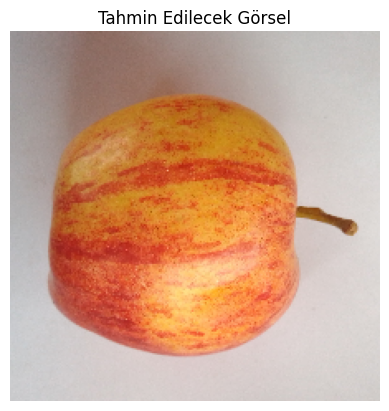

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tahmin: Apple__Healthy
Güven: 99.91%


In [6]:
model = tf.keras.models.load_model(model_path)

img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title("Tahmin Edilecek Görsel")
plt.show()

img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = np.max(predictions[0])

print(f"Tahmin: {class_names[predicted_class_index]}")
print(f"Güven: {confidence * 100:.2f}%")